# Predicting the Critical Temperature of a Superconductor

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- dplyr
- reshape2
- ggplot2
- GGally
- grid
- gridExtra
- scales
- car
- glmnet
- praznik
- xgboost

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>
Superconductivity is a phenomenon of exactly zero electrical resistance and expulsion of magnetic flux fields occurring in certain materials, called superconductors, when cooled below a characteristic critical temperature. Superconductors are widely used in many industry fields, e.g. the Magnetic Resonance Imaging (MRI) in health care, electricity transportation in energy industry and magnetic separation, etc.

In this task, we are going to analyze superconductor data from the Superconducting Material Database maintained by Japan’s National Institute for Materials Science (NIMS). The aim is to build statistical models that can predict
Critical Temperature based on the material’s chemical properties.

These are the two tasks of this analysis: 
- **predict** the critical temperature Tc given some chemical properties of a material?
- **explain** prediction and the associated findings? 

Lets start with loading the required libraries.

In [1]:
# Load Libraries
library(dplyr)
library(reshape2)
library(ggplot2)
library(GGally)
library(grid)
library(gridExtra)
library(scales)
library(car)
library(glmnet)
library(praznik)
library(xgboost)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18


Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



Reading the data and exploring

In [2]:
# Read Data
super <- read.csv("train.csv")

In [3]:
# Checking first few rows
head(super)

# Display the dimensions
cat("The Super condutors dataset has", dim(super)[1], "records, each with", dim(super)[2],
    "attributes. The structure is:\n\n")

# Display the summary statistics
summary(super)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


The Super condutors dataset has 21263 records, each with 82 attributes. The structure is:



 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

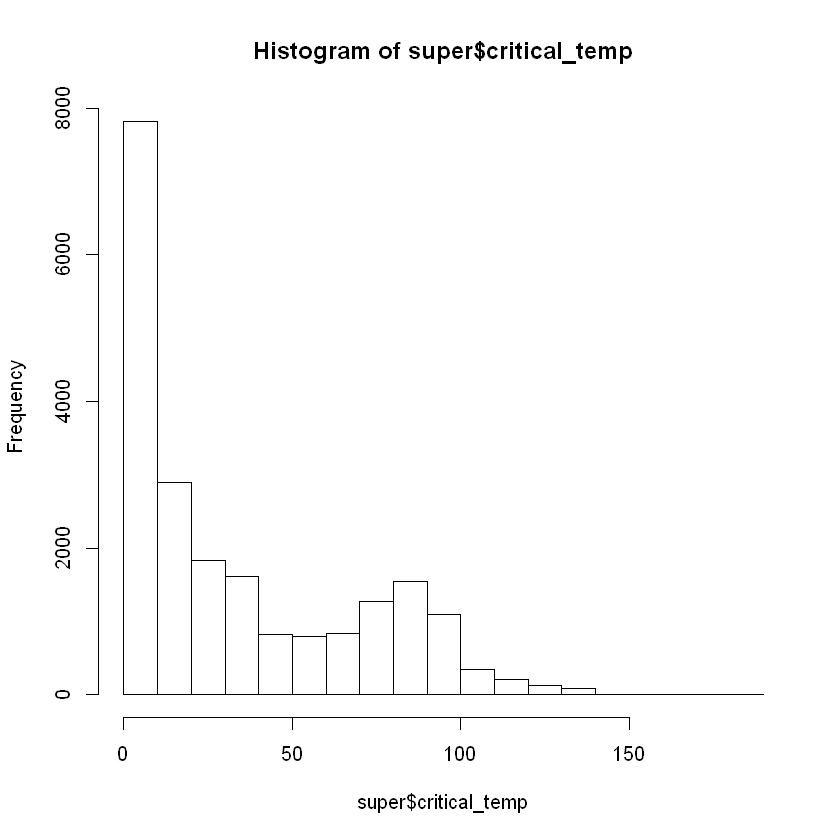

In [4]:
# Checking the distribution of target variable
hist(super$critical_temp)

The distribution of critical temp appears to be right skewed, indicating the range of cirtical temp for most supercondutors is at very cold temperatures. 

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

#### Number Of Elements
Let us analyse how the critical temperature changes with number of elements by plotting a distribution of critical temperatture for each value of number of elements. 

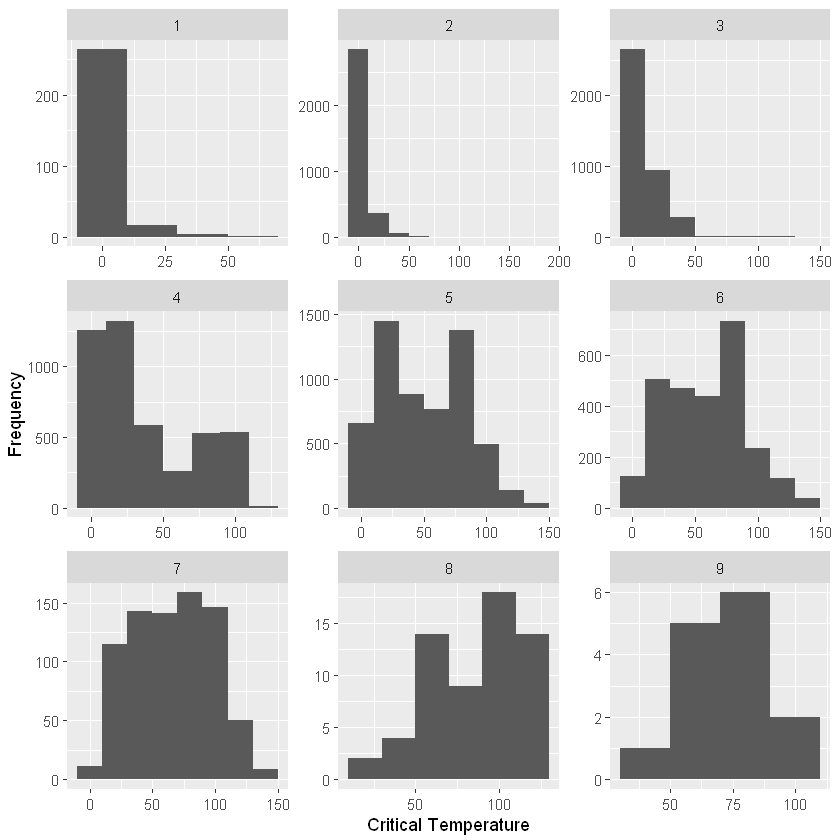

In [5]:
# Plotting histogram for each value of number of elements
ggplot(super,aes(critical_temp)) + geom_histogram(binwidth = 20) + facet_wrap(~number_of_elements, scales = 'free') + xlab('Critical Temperature') + ylab('Frequency')

It can be observed above that as the number of elements in a superconductor material increases, the distribution of critical temperature tends towards normal distribution. In other words, the lesses the number of elements, more likely it is that its critical temperature is very low. 

Data Contains 8 properties about the superconductor material and each property is described by 10 features as follows:

Properties: **Atomic Mass, fie, atomic radius, Density, Electron Affinity, Fusion Heat, Thermal Conductivity, Valence**

Features for each property: **mean, wtd_mean, gmean, wtd_gmean, entropy, wtd_entropy, range, wtd_range, std, wtd_std**


Plotting a corelation of all of these features with response variable `critical_temp`

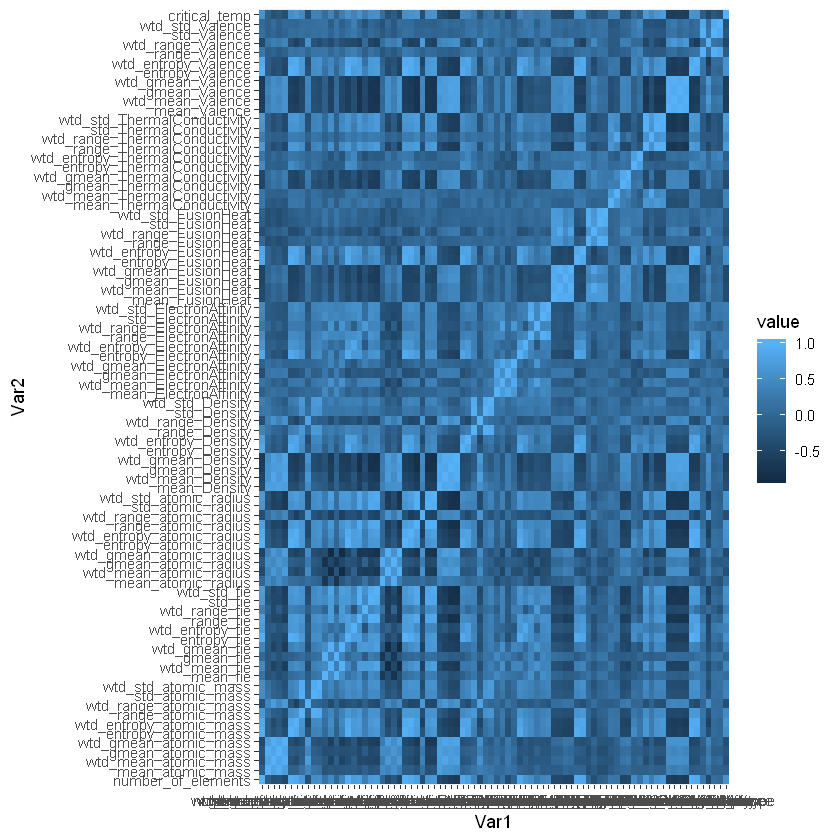

In [6]:
# computing corelation matrix
corel <- round(cor(super),2)
# using melt to get the correlation matrix in a format that is easier to plot
melted_corel <- melt(corel) %>% as.data.frame()

# Plotting correlation matrix
ggplot(data = melted_corel, aes(x=Var1, y=Var2, fill=value)) + geom_tile()

This graph is not interpretable. Analysing each property individually in association with critical temperature.

Writing following helper functions first for preparing the analysing data:
- prepdata : to wrangle data selecting 10 specific feature columns for each property.
- panel.cor : plotting function to be used with pairs to make lower triagle to show corelations

In [7]:
# http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix
panel.cor <- function(w, z, ...) {
  correlation <- cor(w, z)
    
  colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
  ## colorRamp() returns a function which takes as an argument a number
  ## on [0,1] and returns a color in the gradient in colorRange
  myColorRampFunc <- colorRamp(colorRange)

  ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
  col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )
  
  ## square it to avoid visual bias due to "area vs diameter"
  radius <- sqrt(abs(correlation))
  radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
  x <- radius * cos(radians)
  y <- radius * sin(radians)
  ## make them full loops
  x <- c(x, tail(x,n=1))
  y <- c(y, tail(y,n=1))
  
  ## trick: "don't create a new plot" thing by following the
  ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
  ## This allows
  par(new=TRUE)
  plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
  polygon(x, y, border=col, col=col)
}

# this function takes df, s=start col, e=end col as argument and return dataframe with selected columns along with response var
prepdata <- function(df,s,e){
  df <- df[,c(names(df)[s:e],names(df)[82])] 
  colnames(df) <-  c('mean','wtd_mean','gmean','wtd_gmean','entropy','wtd_entropy','range','wtd_range','std','wtd_std','critical_temp')
  return(df)
}

Creating data frames for each property.

In [8]:
# Using prepdata to obtain data frames for each property, containing 10 features and critical temp
atomicMass           <-prepdata(super,2,11)
fie                  <-prepdata(super,12,21)
atomicRadius         <-prepdata(super,22,31)
density              <-prepdata(super,32,41)
electronAffinity     <-prepdata(super,42,51)
fusionHeat           <-prepdata(super,52,61)
thermalConductivity  <-prepdata(super,62,71)
valence              <-prepdata(super,72,81)

In the following section each property's all features are plotted to show a relationship with each other and with response variable 'critical temp'. This is done by plotting half a corelation matrix and half of scatter plot. Corelation values indicate the strength of linear relationship and scartter plots show how the values are distributed if there a visible underlying trend.

#### Atomic Mass
features : **mean, wtd_mean, gmean, wtd_gmean, entropy, wtd_entropy, range, wtd_range, std, wtd_std**

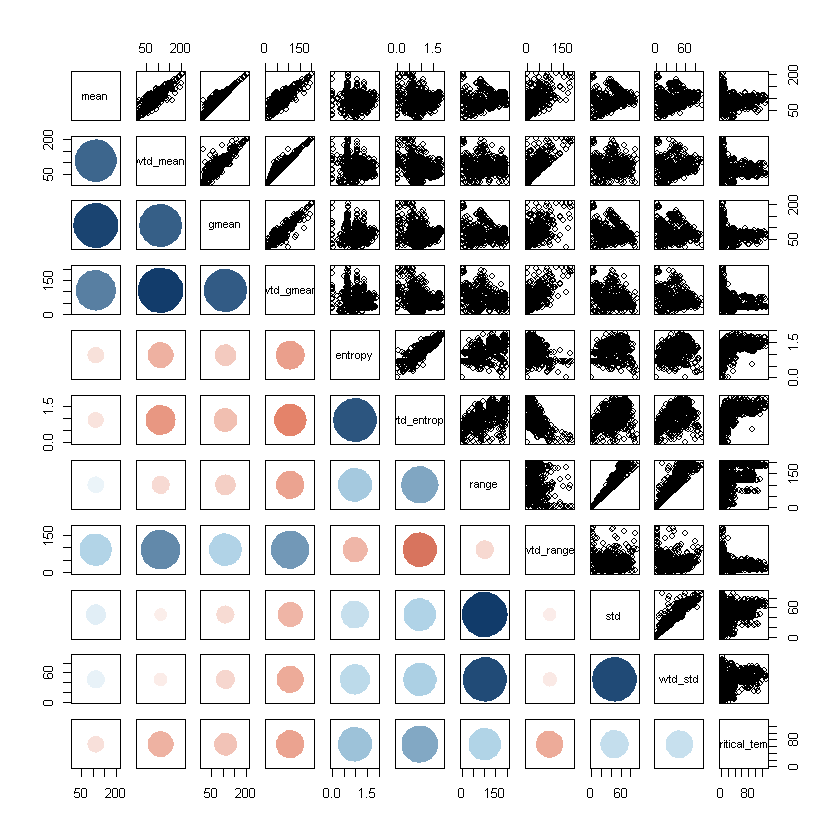

In [9]:
pairs(atomicMass[sample.int(nrow(atomicMass),1000),], lower.panel=panel.cor)

The above corelation matrix shows that etropy and wtd_entropy are the ones highly positively corelated to critical temperature. Variables with high negative corelation with target are wtd_mean and wtd_gmean.

#### fie

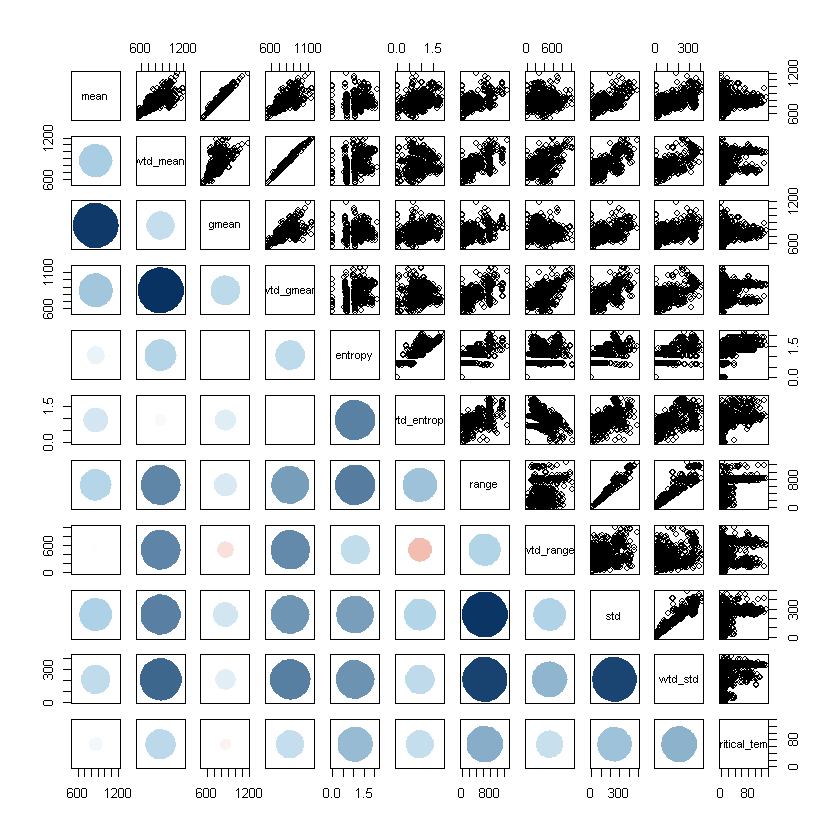

In [10]:
pairs(fie[sample.int(nrow(fie),1000),], lower.panel=panel.cor)

For the property fie, the features that have high corelation with critical temp are entropy, range and wtd_std.

#### Atomic Radius

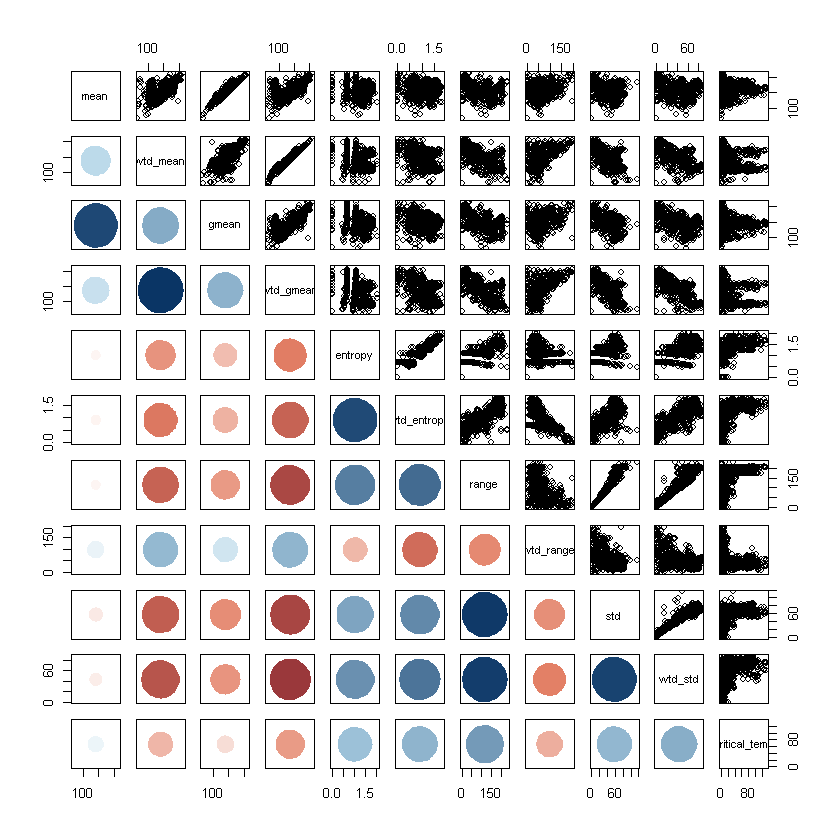

In [11]:
pairs(atomicRadius[sample.int(nrow(atomicRadius),1000),], lower.panel=panel.cor)

For atomic radius, the features that have high positive corelation with critical temperature are range and wtd_std. Property with high negative corelation are wtd_gmean and wtd_range. Critical temperature vs. Entropy seems to follow a non linear trend. 

#### Density

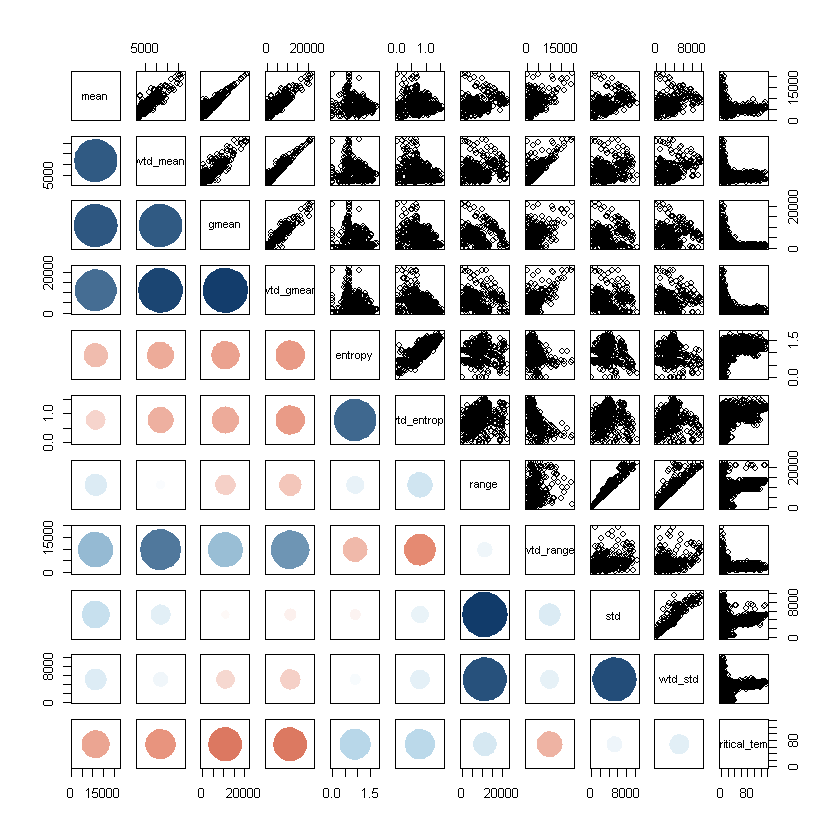

In [12]:
pairs(density[sample.int(nrow(density),1000),], lower.panel=panel.cor)

For Density, features with high negative corelation with critical temp are gmean and wtd_gmean. 

#### Electron Affinity

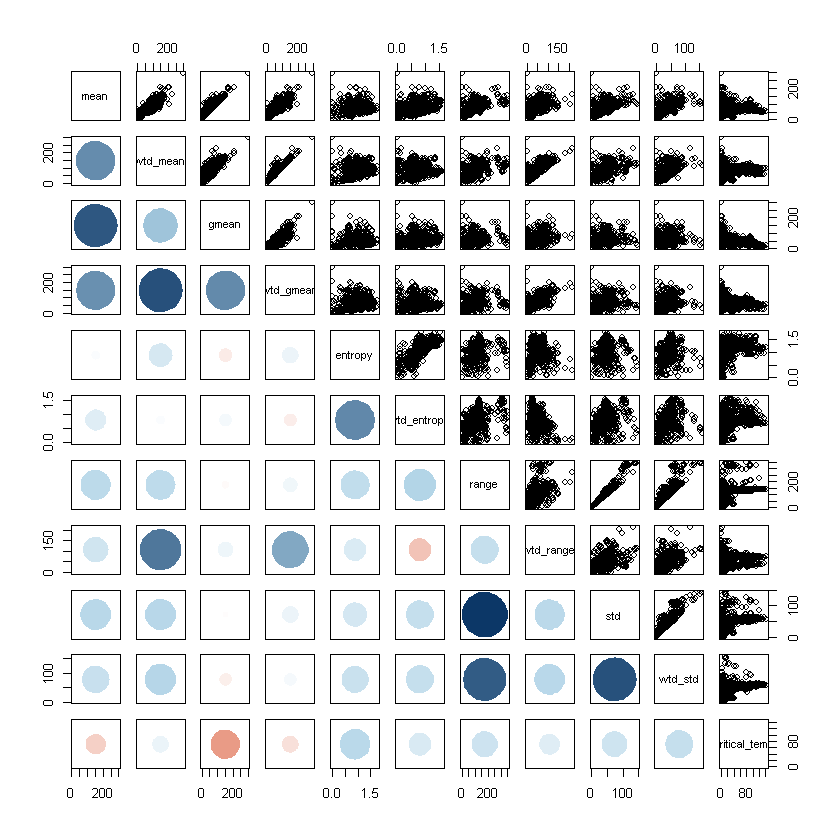

In [13]:
pairs(electronAffinity[sample.int(nrow(electronAffinity),1000),], lower.panel=panel.cor)

For Electron Affinity, features with high corelation with critical temp are gmean and entropy. 

#### Fusion Heat

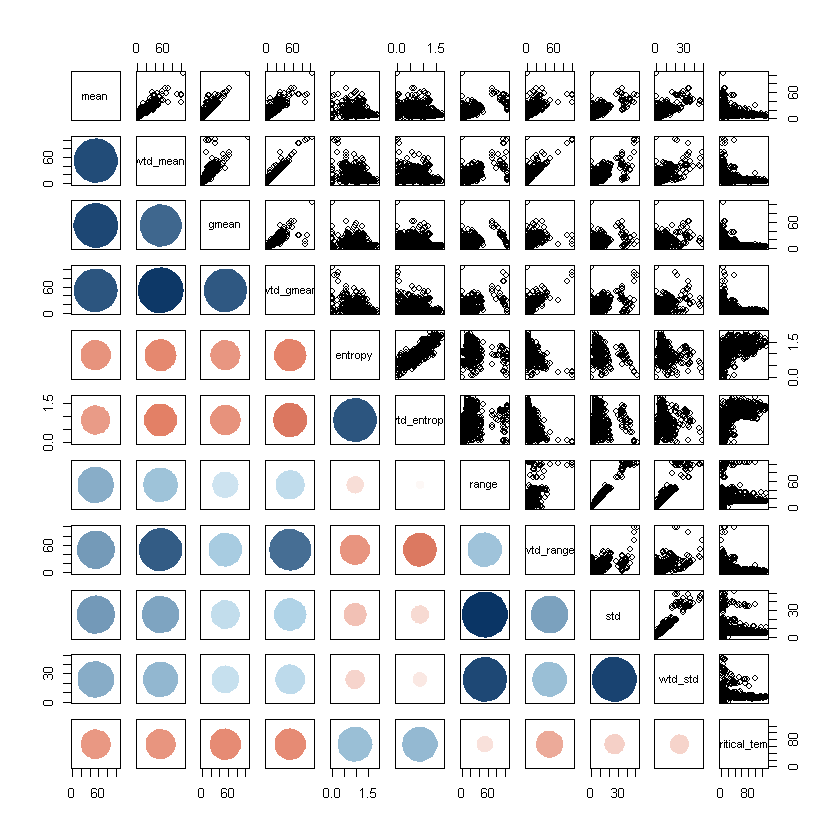

In [14]:
pairs(fusionHeat[sample.int(nrow(fusionHeat),1000),], lower.panel=panel.cor)

For Fusion Heat property, features that have high neagtive corelation with target are mean and gmean. Features with high positive corelation are entropy and wtd_entropy.

#### Thermal Conductivity

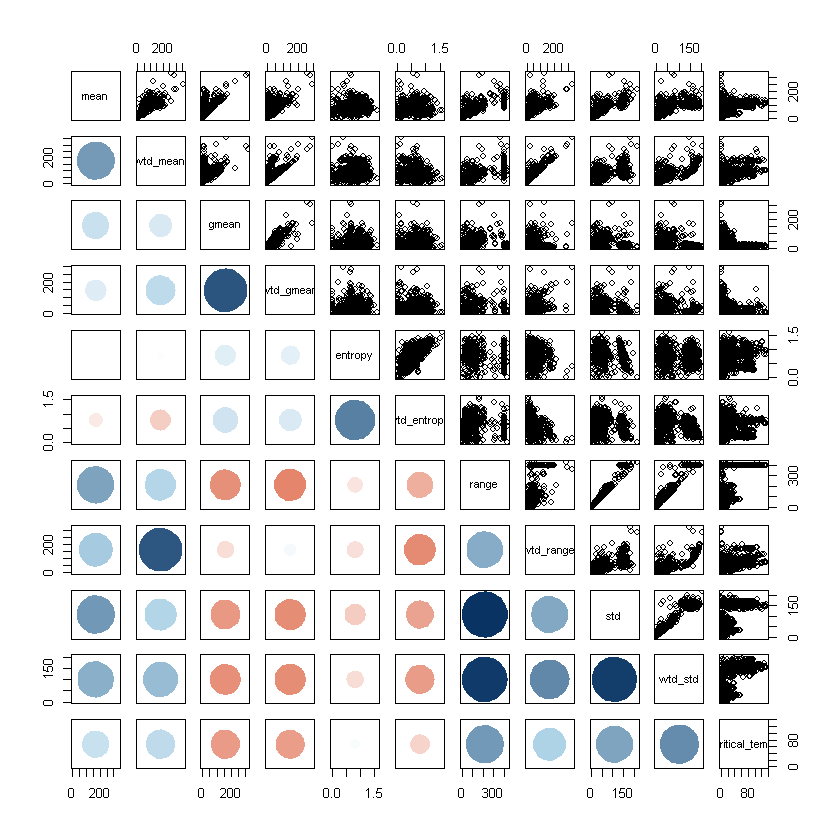

In [15]:
pairs(thermalConductivity[sample.int(nrow(thermalConductivity),1000),], lower.panel=panel.cor)

For Thermal Conductivity, features with high positive corelation with critical temp are range, std and wtd_std. Features with high neagative corelation are gmean and wtd_gmean.

#### Valence

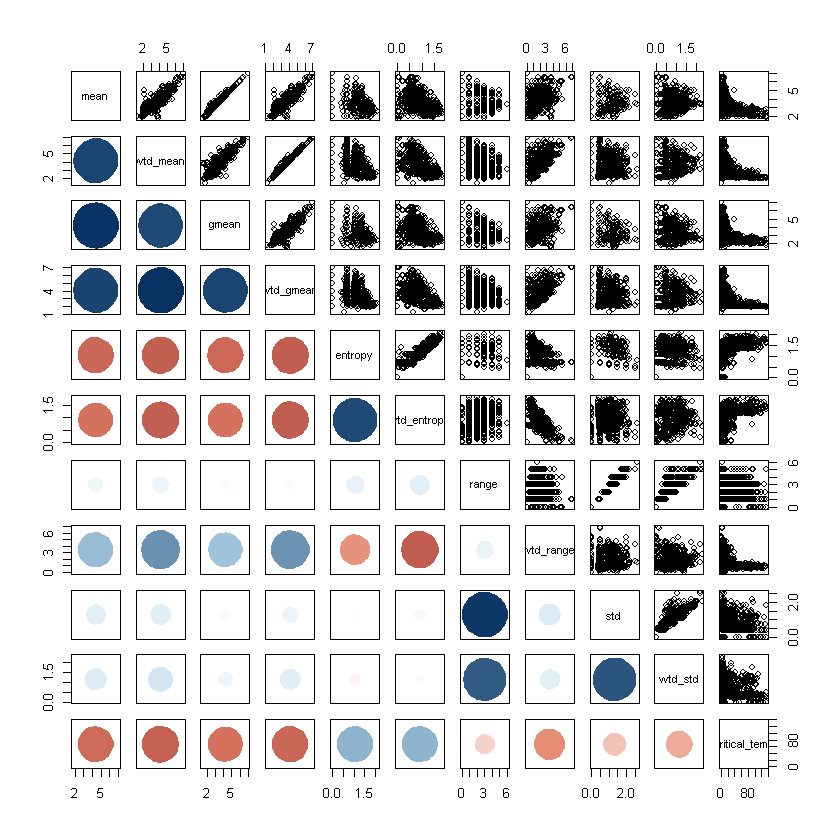

In [16]:
pairs(valence[sample.int(nrow(valence),1000),], lower.panel=panel.cor)

For Valence, features with high positive corelaion with the target are entropy and wtd_entropy. Features with high negative corelation are mean, wtd_mean, gmean and wtd_gmean. 

**General Observations:**
1. For all properties mean, wtd_mean, gmean and wtd_gmean are highly corelated with each other. 
2. Amongst all properties, the feature and its wtd corresponding feature are also related as expected. 
3. Some of the features also have a non-linear relationship with the target variable which can be seen on the scatter plot but is not captured in the corelation metric.
4. The entropy feature for all properties has a generally linear relationship with critical temperature. 

## 3. Model Development<a class="anchor" id="sec_3"></a>

#### Test Train Split
Spliting the dataset in to training and test set with a 70:30 ration. Train is 70% and test is 30% of data based on a random split done using `sample()` method. 

In [17]:
# Test - train split
set.seed(100)
trainindices = sample(1:nrow(super), 0.7*nrow(super))
train = super[trainindices,]
test = super[-trainindices,]

train.x = train[,-82]
train.y = train[,82]

test.x = test[,-82]
test.y = test[,-82]

In [18]:
dim(test.x)

[1] 6379   81

### Model 1 : Building first model using features that have high correlation with target variable

Checking the **variance** of all features and removing features where variation is less than 0.1 (10%) as it would not have significant contribution to the model due to value not changing much. 

In [19]:
# Finding variance for each column
colvars <- sort(apply(X = train,2, FUN = var))

sort(colvars)

wtd_entropy_ElectronAffinity wtd_entropy_ThermalConductivity 
                   8.223497e-02                    1.013973e-01 
            wtd_entropy_Density     entropy_ThermalConductivity 
                   1.017918e-01                    1.060225e-01 
                wtd_entropy_fie                 entropy_Density 
                   1.122696e-01                    1.160037e-01 
       entropy_ElectronAffinity             entropy_atomic_mass 
                   1.175041e-01                    1.325082e-01 
         wtd_entropy_FusionHeat              entropy_FusionHeat 
                   1.357625e-01                    1.392446e-01 
          entropy_atomic_radius                     entropy_fie 
                   1.396358e-01                    1.445675e-01 
            wtd_entropy_Valence                 entropy_Valence 
                   1.447221e-01                    1.535226e-01 
        wtd_entropy_atomic_mass       wtd_entropy_atomic_radius 
                   1.611638e-01                    1.650581e-01 
                wtd_std_Valence                     std_Valence 
                   2.095519e-01                    2.380612e-01 
              wtd_range_Valence                    mean_Valence 
                   9.652726e-01                    1.088159e+00 
                  gmean_Valence               wtd_gmean_Valence 
                   1.088766e+00                    1.378738e+00 
               wtd_mean_Valence                   range_Valence 
                   1.420725e+00                    1.560760e+00 
             number_of_elements              wtd_std_FusionHeat 
                   2.059427e+00                    5.267639e+01 
                 std_FusionHeat                gmean_FusionHeat 
                   7.428111e+01                    1.004796e+02 
           wtd_range_FusionHeat                 mean_FusionHeat 
                   1.243128e+02                    1.267571e+02 
           wtd_gmean_FusionHeat             wtd_mean_FusionHeat 
                   1.686599e+02                    1.979466e+02 
            wtd_std_atomic_mass                 std_atomic_mass 
                   3.959104e+02                    3.996104e+02 
             mean_atomic_radius                range_FusionHeat 
                   4.076565e+02                    4.131061e+02 
       wtd_std_ElectronAffinity            std_ElectronAffinity 
                   4.198196e+02                    4.781304e+02 
            gmean_atomic_radius               std_atomic_radius 
                   4.889123e+02                    5.206924e+02 
          wtd_std_atomic_radius           wtd_range_atomic_mass 
                   6.375708e+02                    7.455551e+02 
          mean_ElectronAffinity      wtd_range_ElectronAffinity 
                   7.730700e+02                    8.182983e+02 
         wtd_mean_atomic_radius          gmean_ElectronAffinity 
                   8.227026e+02                    8.413138e+02 
               mean_atomic_mass               gmean_atomic_mass 
                   8.662586e+02                    9.452033e+02 
     wtd_gmean_ElectronAffinity       wtd_mean_ElectronAffinity 
                   1.011178e+03                    1.052236e+03 
           wtd_mean_atomic_mass       gmean_ThermalConductivity 
                   1.111999e+03                    1.175679e+03 
                  critical_temp         wtd_range_atomic_radius 
                   1.180589e+03                    1.227781e+03 
        wtd_gmean_atomic_radius           wtd_gmean_atomic_mass 
                   1.276642e+03                    1.330406e+03 
       mean_ThermalConductivity   wtd_gmean_ThermalConductivity 
                   1.497566e+03                    1.634705e+03 
  wtd_range_ThermalConductivity    wtd_mean_ThermalConductivity 
                   1.852998e+03                    2.089603e+03 
              range_atomic_mass          range_ElectronAffinity 
                   2.964375e+03       

Here it can be seen that only one variable has variance less than 0.1 - **wtd_entropy_ElectronAffinity**. This feature will be removed in the next step.

In [20]:
# Filtering columns where variance is more than 0.1
train_11 <- train[colvars > 0.1]

Now checking the **correlation** of each feature with the response variable and keeping only the ones which have corelation above 0.5 or less than -0.5. This helps understand which features have a strong linear relationship with the target variable.  

In [21]:
# Creating correlation matrix
corel <- round(cor(train_11),2)

# Using melt to obtain column-wise data
melted_corel <- melt(corel) %>% as.data.frame()

# priting correlation of variables and critical temp where corelation is >0.5 or <-0.5 
(melted_corel <- filter(melted_corel, melted_corel$Var2=="critical_temp",abs(value)>0.5))

Var1,Var2,value
entropy_atomic_mass,critical_temp,0.54
wtd_entropy_atomic_mass,critical_temp,0.63
entropy_fie,critical_temp,0.57
range_fie,critical_temp,0.60
std_fie,critical_temp,0.55
wtd_std_fie,critical_temp,0.59
entropy_atomic_radius,critical_temp,0.56
wtd_entropy_atomic_radius,critical_temp,0.61
range_atomic_radius,critical_temp,0.66
std_atomic_radius,critical_temp,0.56


Now , subsetting the train data to include only columns with high corelation as obtained in the previous step. 

In [22]:
# Filtering train data for columns with high corelation
train_12 <- train_11[melted_corel$Var1]
# Checking variable names
(high_corel_vars <- names(train_12))
# Checking the dimentions of the dataset
dim(train_12)

[1] "entropy_atomic_mass"         "wtd_entropy_atomic_mass"    
 [3] "entropy_fie"                 "range_fie"                  
 [5] "std_fie"                     "wtd_std_fie"                
 [7] "entropy_atomic_radius"       "wtd_entropy_atomic_radius"  
 [9] "range_atomic_radius"         "std_atomic_radius"          
[11] "wtd_std_atomic_radius"       "gmean_Density"              
[13] "wtd_gmean_Density"           "entropy_FusionHeat"         
[15] "wtd_entropy_FusionHeat"      "range_ThermalConductivity"  
[17] "std_ThermalConductivity"     "wtd_std_ThermalConductivity"
[19] "mean_Valence"                "wtd_mean_Valence"           
[21] "gmean_Valence"               "wtd_gmean_Valence"          
[23] "entropy_Valence"             "wtd_entropy_Valence"        
[25] "critical_temp"

[1] 14884    25

Here it can be seen that the train data now consists of 25 variables which are highly correlated to the target.

Now using another technique called `mRMR (minimum Redundancy Maximum Relevance)` to obtain features that are of highest importance.  mRMR uses mutual information to analyze relevance and redundancy. In mRMR, the feature that has the maximum relevance measure and minimum redundancy measure with the already selected features is selected and added to the subset. Obtaining top 20 features as per Mututal information using mRMR.

In [23]:
# selcting top 20 features with highest gain score
(mrmr_vars <- names((MRMR(train[,-82],train[,82],k=20))$score))

[1] "range_atomic_radius"           "wtd_range_ThermalConductivity"
 [3] "gmean_ElectronAffinity"        "wtd_entropy_atomic_mass"      
 [5] "gmean_Valence"                 "mean_ThermalConductivity"     
 [7] "gmean_FusionHeat"              "wtd_range_Valence"            
 [9] "gmean_Density"                 "wtd_std_ThermalConductivity"  
[11] "std_Density"                   "wtd_mean_Valence"             
[13] "wtd_range_atomic_radius"       "wtd_range_FusionHeat"         
[15] "std_ElectronAffinity"          "wtd_entropy_Valence"          
[17] "range_ThermalConductivity"     "wtd_gmean_ElectronAffinity"   
[19] "mean_Valence"                  "mean_atomic_mass"

A list of top 20 features using mRMR is shown above. Combing these features with 25 features obtained previously based on high corelation.

In [24]:
# finding a union of highly correlated variables and mRMR variables
(model_1_features = union(high_corel_vars,mrmr_vars))

[1] "entropy_atomic_mass"           "wtd_entropy_atomic_mass"      
 [3] "entropy_fie"                   "range_fie"                    
 [5] "std_fie"                       "wtd_std_fie"                  
 [7] "entropy_atomic_radius"         "wtd_entropy_atomic_radius"    
 [9] "range_atomic_radius"           "std_atomic_radius"            
[11] "wtd_std_atomic_radius"         "gmean_Density"                
[13] "wtd_gmean_Density"             "entropy_FusionHeat"           
[15] "wtd_entropy_FusionHeat"        "range_ThermalConductivity"    
[17] "std_ThermalConductivity"       "wtd_std_ThermalConductivity"  
[19] "mean_Valence"                  "wtd_mean_Valence"             
[21] "gmean_Valence"                 "wtd_gmean_Valence"            
[23] "entropy_Valence"               "wtd_entropy_Valence"          
[25] "critical_temp"                 "wtd_range_ThermalConductivity"
[27] "gmean_ElectronAffinity"        "mean_ThermalConductivity"     
[29] "gmean_FusionHeat"              "wtd_range_Valence"            
[31] "std_Density"                   "wtd_range_atomic_radius"      
[33] "wtd_range_FusionHeat"          "std_ElectronAffinity"         
[35] "wtd_gmean_ElectronAffinity"    "mean_atomic_mass"

In [25]:
# Checking number of selected vars
length(model_1_features)

[1] 36

After combing features that have high corelation and the top 20 selected by mRMR, we get 36 features in total as shown above. These features will be used to create a model using training data. 

In [26]:
# creating a model with features selected above
fit1_model_1 <- lm(critical_temp~.,data=train[model_1_features])

In [27]:
# checking summary of model 1
summary(fit1_model_1)


Call:
lm(formula = critical_temp ~ ., data = train[model_1_features])

Residuals:
    Min      1Q  Median      3Q     Max 
-77.836 -11.820   0.261  12.285 204.903 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.313e+01  2.137e+00   6.141 8.41e-10 ***
entropy_atomic_mass           -5.026e+01  2.938e+00 -17.109  < 2e-16 ***
wtd_entropy_atomic_mass        3.669e+01  2.255e+00  16.270  < 2e-16 ***
entropy_fie                    1.235e+02  1.743e+01   7.084 1.46e-12 ***
range_fie                      4.523e-02  6.547e-03   6.909 5.10e-12 ***
std_fie                       -1.480e-02  1.856e-02  -0.798 0.425126    
wtd_std_fie                   -8.681e-02  1.000e-02  -8.678  < 2e-16 ***
entropy_atomic_radius         -7.558e+01  1.554e+01  -4.865 1.16e-06 ***
wtd_entropy_atomic_radius      2.356e+01  4.557e+00   5.171 2.36e-07 ***
range_atomic_radius            5.095e-01  2.589e-02  19.679  < 2e-16 ***
std_atomic_radius

Here we can see that almost all of the variable have high significance, except for a few. Using `stepwise selection as a wrapper method` on the model produced in the above step to find best possible model based on lowest AIC values. Step traverses through many subsets of features and adds(forward) or removes(backward) the feature based on changes in AIC value. A combination of forward and backward approach can be obtained using direction=both.

In [28]:
fit2_model_1 <- step(fit1_model_1, direction = 'both', trace = T)

Start:  AIC=88573.95
critical_temp ~ entropy_atomic_mass + wtd_entropy_atomic_mass + 
    entropy_fie + range_fie + std_fie + wtd_std_fie + entropy_atomic_radius + 
    wtd_entropy_atomic_radius + range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + gmean_Density + wtd_gmean_Density + 
    entropy_FusionHeat + wtd_entropy_FusionHeat + range_ThermalConductivity + 
    std_ThermalConductivity + wtd_std_ThermalConductivity + mean_Valence + 
    wtd_mean_Valence + gmean_Valence + wtd_gmean_Valence + entropy_Valence + 
    wtd_entropy_Valence + wtd_range_ThermalConductivity + gmean_ElectronAffinity + 
    mean_ThermalConductivity + gmean_FusionHeat + wtd_range_Valence + 
    std_Density + wtd_range_atomic_radius + wtd_range_FusionHeat + 
    std_ElectronAffinity + wtd_gmean_ElectronAffinity + mean_atomic_mass

                                Df Sum of Sq     RSS   AIC
- wtd_range_ThermalConductivity  1       194 5689821 88572
- std_fie                        1       244 56

In [29]:
summary(fit2_model_1)


Call:
lm(formula = critical_temp ~ entropy_atomic_mass + wtd_entropy_atomic_mass + 
    entropy_fie + range_fie + wtd_std_fie + entropy_atomic_radius + 
    wtd_entropy_atomic_radius + range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + gmean_Density + wtd_gmean_Density + 
    entropy_FusionHeat + wtd_entropy_FusionHeat + range_ThermalConductivity + 
    std_ThermalConductivity + wtd_std_ThermalConductivity + mean_Valence + 
    wtd_mean_Valence + gmean_Valence + wtd_gmean_Valence + entropy_Valence + 
    wtd_entropy_Valence + gmean_ElectronAffinity + mean_ThermalConductivity + 
    gmean_FusionHeat + wtd_range_Valence + std_Density + wtd_range_atomic_radius + 
    wtd_range_FusionHeat + std_ElectronAffinity + wtd_gmean_ElectronAffinity + 
    mean_atomic_mass, data = train[model_1_features])

Residuals:
    Min      1Q  Median      3Q     Max 
-78.008 -11.798   0.273  12.328 204.563 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|) 

Now it can be seen that all selected variables are significant in the model selected by step. The F-Statistic of the model is 939.6 with p-value < 2.2e-16 which is very less and can reject the null hypothesis that the model is not useful. Evaluating this model on test set. Before that storing feature names selected by step for future use. 

In [30]:
# saving final model
final_model_1 <- fit2_model_1

# features selected by final model 1
(model_1_features_final <- names(final_model_1$coefficients)[-1])

[1] "entropy_atomic_mass"         "wtd_entropy_atomic_mass"    
 [3] "entropy_fie"                 "range_fie"                  
 [5] "wtd_std_fie"                 "entropy_atomic_radius"      
 [7] "wtd_entropy_atomic_radius"   "range_atomic_radius"        
 [9] "std_atomic_radius"           "wtd_std_atomic_radius"      
[11] "gmean_Density"               "wtd_gmean_Density"          
[13] "entropy_FusionHeat"          "wtd_entropy_FusionHeat"     
[15] "range_ThermalConductivity"   "std_ThermalConductivity"    
[17] "wtd_std_ThermalConductivity" "mean_Valence"               
[19] "wtd_mean_Valence"            "gmean_Valence"              
[21] "wtd_gmean_Valence"           "entropy_Valence"            
[23] "wtd_entropy_Valence"         "gmean_ElectronAffinity"     
[25] "mean_ThermalConductivity"    "gmean_FusionHeat"           
[27] "wtd_range_Valence"           "std_Density"                
[29] "wtd_range_atomic_radius"     "wtd_range_FusionHeat"       
[31] "std_ElectronAffinity"        "wtd_gmean_ElectronAffinity" 
[33] "mean_atomic_mass"

Using the model to predict on test dataset. 

In [31]:
# Using the model fit to make predictions on test set and storing them in a new column in test set
test$predm1 <- predict(fit2_model_1,test[model_1_features_final]) 

# Calculating r-squared value
rsq_model1 <- cor(test$critical_temp,test$predm1)^2
cat("The R-squared value on test set for Model 1 is: ", rsq_model1)


# Calculating RMSE
rmse_model1 <- (mean((test$critical_temp - test$predm1)^2))^0.5 
cat("\nThe RMSE on test set for Model 1 is :", rmse_model1)

The R-squared value on test set for Model 1 is:  0.6631949
The RMSE on test set for Model 1 is : 19.73956

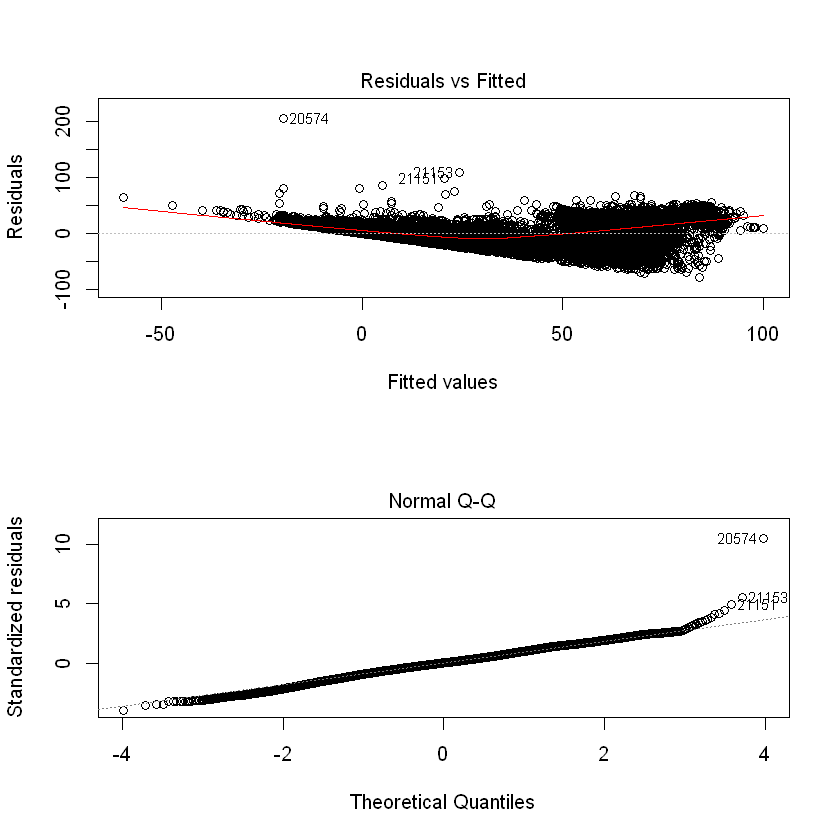

In [32]:
# plotting residuals
par(mfrow=c(2,1))
plot(fit2_model_1, which=1)
plot(fit2_model_1, which=2)

Model 1 has r-squared of 0.663 meaning it can explain 66.31% variation in the data, which is not great and the model can be improved further but a better feature selection technique would need to be used. It can also be seen from the residuals vs fitted plot that there is some non-linear trend which is not captured, although from the Q-Q plot it can be seen that the residuals are normally distributed. 

### Model 2: Linear regression with Regularization

Another method for feature selection is `Shrinkage methods`In these methods the co-efficients of non-relevant features in the model are regularized to tend towards 0 making the model simpler and in effect shrinking it.  

#### Elastic Net
Elastic net is a combination of ridge and lasso regularization. With this technique we aim to reduce the number of features and reduce the effects of features that are not relevant. 

In [33]:
#  creating elastic net model and tuning it using Cross Validation
fit.elnet <- glmnet(as.matrix(train.x), as.matrix(train.y), family="gaussian", alpha=.5)
fit.elnet.cv <- cv.glmnet(as.matrix(train.x), as.matrix(train.y), type.measure="mse", alpha=.5,
                          family="gaussian")

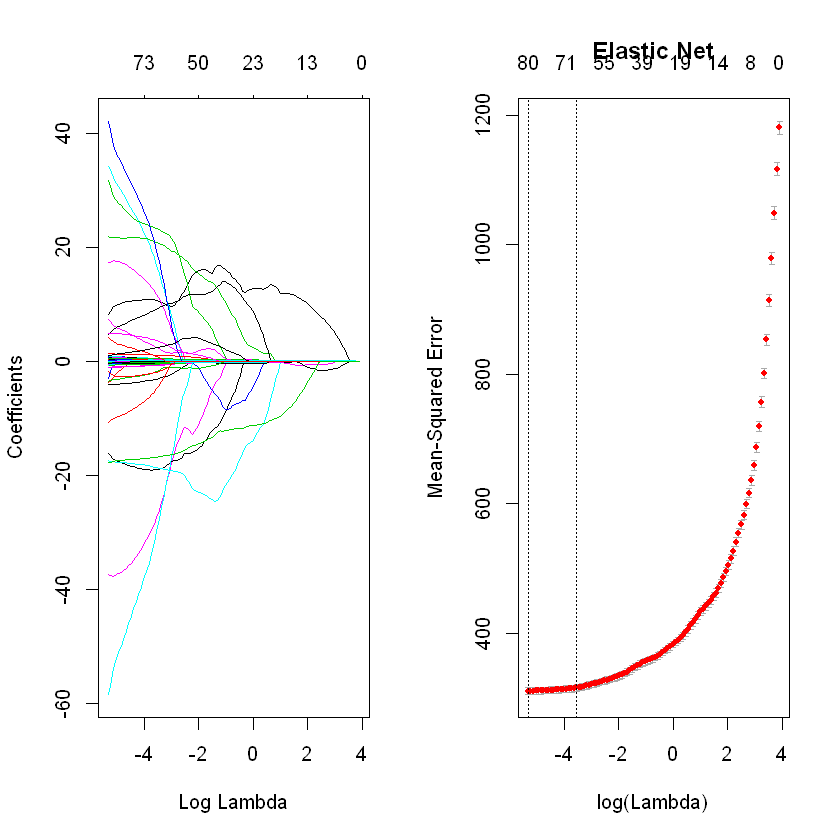

In [34]:
# Plot solution paths:
par(mfrow=c(1,2))
plot(fit.elnet,xvar="lambda")
plot(fit.elnet.cv, main="Elastic Net")

In [35]:
# making predictions using fitted model above
test$pred_elnet <- predict(fit.elnet.cv, s=fit.elnet.cv$lambda.1se, newx=as.matrix(test.x))

# Calculating r-squared value
rsq_model2 <- cor(test$critical_temp,test$pred_elnet)^2
cat("The R-squared value on test set for Model 1 is: ", rsq_model2)


# Calculating RMSE
rmse_model2 <- (mean((test$critical_temp - test$pred_elnet)^2))^0.5 
cat("\nThe RMSE on test set for Model 1 is :", rmse_model2)

The R-squared value on test set for Model 1 is:  0.7197487
The RMSE on test set for Model 1 is : 18.00558

As it can be seen model with Elastic Net regularization performs better in terms of R-sq and RMSE. Let see which features were selected by this model. 

In [48]:
length(unlist(fit.elnet.cv$glmnet.fit$beta@Dimnames[1]))
unlist(fit.elnet.cv$glmnet.fit$beta@Dimnames[1])

[1] 81

[1] "number_of_elements"              "mean_atomic_mass"               
 [3] "wtd_mean_atomic_mass"            "gmean_atomic_mass"              
 [5] "wtd_gmean_atomic_mass"           "entropy_atomic_mass"            
 [7] "wtd_entropy_atomic_mass"         "range_atomic_mass"              
 [9] "wtd_range_atomic_mass"           "std_atomic_mass"                
[11] "wtd_std_atomic_mass"             "mean_fie"                       
[13] "wtd_mean_fie"                    "gmean_fie"                      
[15] "wtd_gmean_fie"                   "entropy_fie"                    
[17] "wtd_entropy_fie"                 "range_fie"                      
[19] "wtd_range_fie"                   "std_fie"                        
[21] "wtd_std_fie"                     "mean_atomic_radius"             
[23] "wtd_mean_atomic_radius"          "gmean_atomic_radius"            
[25] "wtd_gmean_atomic_radius"         "entropy_atomic_radius"          
[27] "wtd_entropy_atomic_radius"       "range_atomic_radius"            
[29] "wtd_range_atomic_radius"         "std_atomic_radius"              
[31] "wtd_std_atomic_radius"           "mean_Density"                   
[33] "wtd_mean_Density"                "gmean_Density"                  
[35] "wtd_gmean_Density"               "entropy_Density"                
[37] "wtd_entropy_Density"             "range_Density"                  
[39] "wtd_range_Density"               "std_Density"                    
[41] "wtd_std_Density"                 "mean_ElectronAffinity"          
[43] "wtd_mean_ElectronAffinity"       "gmean_ElectronAffinity"         
[45] "wtd_gmean_ElectronAffinity"      "entropy_ElectronAffinity"       
[47] "wtd_entropy_ElectronAffinity"    "range_ElectronAffinity"         
[49] "wtd_range_ElectronAffinity"      "std_ElectronAffinity"           
[51] "wtd_std_ElectronAffinity"        "mean_FusionHeat"                
[53] "wtd_mean_FusionHeat"             "gmean_FusionHeat"               
[55] "wtd_gmean_FusionHeat"            "entropy_FusionHeat"             
[57] "wtd_entropy_FusionHeat"          "range_FusionHeat"               
[59] "wtd_range_FusionHeat"            "std_FusionHeat"                 
[61] "wtd_std_FusionHeat"              "mean_ThermalConductivity"       
[63] "wtd_mean_ThermalConductivity"    "gmean_ThermalConductivity"      
[65] "wtd_gmean_ThermalConductivity"   "entropy_ThermalConductivity"    
[67] "wtd_entropy_ThermalConductivity" "range_ThermalConductivity"      
[69] "wtd_range_ThermalConductivity"   "std_ThermalConductivity"        
[71] "wtd_std_ThermalConductivity"     "mean_Valence"                   
[73] "wtd_mean_Valence"                "gmean_Valence"                  
[75] "wtd_gmean_Valence"               "entropy_Valence"                
[77] "wtd_entropy_Valence"             "range_Valence"                  
[79] "wtd_range_Valence"               "std_Valence"                    
[81] "wtd_std_Valence"

### Model 3 : XGBoost

XGBoost is one of the more popular Machine Learning algorithm which is wide used in the data science community as it is very efficient. Applying XGBoost model to the the current dataset. 

In [37]:
# Setting defaullt parameters
params <- list(eta=0.3, gamma=0, max_depth=6, min_child_weight=1, subsample=1, colsample_bytree=1)

In [38]:
 # Training the model using default parameters and more iterations
fit.xgboost <- xgb.train(params = params,
                        data = xgb.DMatrix(data = as.matrix(train[,-82]), label = as.matrix(train[,82])),
                        nrounds = 500,
                        nfold = 10, 
                        showsd = T, 
                        stratified = T,
                        print_every_n = 20,
                        early_stopping_rounds = 100,
                        watchlist = list(test = xgb.DMatrix(data = as.matrix(test[,1:81]),label = as.matrix(test[,82]))))

[1]	test-rmse:35.035908 
Will train until test_rmse hasn't improved in 100 rounds.

[21]	test-rmse:10.936006 
[41]	test-rmse:10.476800 
[61]	test-rmse:10.254866 
[81]	test-rmse:10.154818 
[101]	test-rmse:10.069139 
[121]	test-rmse:10.038797 
[141]	test-rmse:10.028865 
[161]	test-rmse:10.023368 
[181]	test-rmse:10.035257 
[201]	test-rmse:10.024297 
[221]	test-rmse:10.008030 
[241]	test-rmse:10.018111 
[261]	test-rmse:10.028219 
[281]	test-rmse:10.020899 
[301]	test-rmse:10.029593 
Stopping. Best iteration:
[219]	test-rmse:10.006484



                            Feature        Gain       Cover   Frequency
 1:       range_ThermalConductivity 0.544208401 0.006412423 0.002002076
 2:   wtd_gmean_ThermalConductivity 0.110503452 0.013029015 0.011715853
 3:                     std_Density 0.019212729 0.007643195 0.005932078
 4:        wtd_std_ElectronAffinity 0.018309874 0.013804323 0.012457363
 5:               wtd_gmean_Valence 0.017191581 0.013006260 0.008156607
 6:                 std_atomic_mass 0.016766367 0.004677480 0.007934154
 7:             range_atomic_radius 0.016664085 0.002178502 0.002521133
 8: wtd_entropy_ThermalConductivity 0.015269660 0.032344947 0.024024915
 9:           wtd_range_atomic_mass 0.012694687 0.023510416 0.025507934
10:     wtd_std_ThermalConductivity 0.012534523 0.035057470 0.022171140
11:                 wtd_std_Valence 0.012407830 0.013559454 0.013717930
12:                   gmean_Density 0.010318158 0.002114520 0.003930001
13:                    mean_Density 0.010220641 0.006306546 0.00

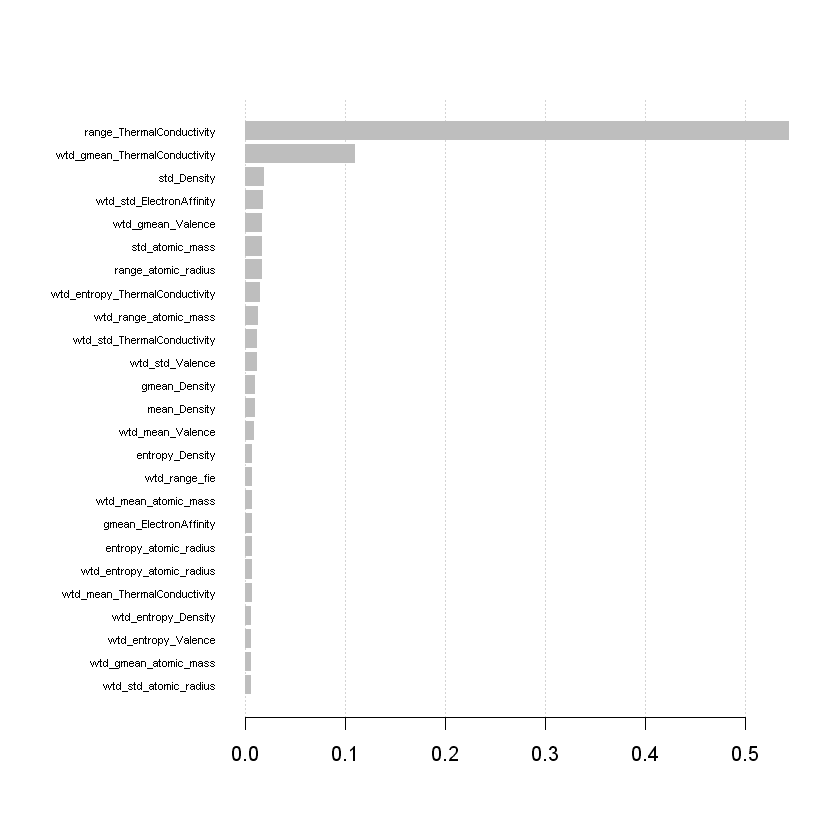

In [39]:
# top 25 most important features
imp_features_xgb <- xgb.importance(colnames(train[,-82]), model = fit.xgboost)[1:25,]
print(imp_features_xgb)
xgb.plot.importance(imp_features_xgb)

Most important feature selected by XGBoost algorithm is `range_ThermalConductivity`.

Using the model created by XGBoost algorithm to find predictions on test data and evaluating the model by using RMSE and R-Squared statistic. 

In [40]:
# Using model created to generate predictions on test data
test_xgbDMatrix <- xgb.DMatrix(data = as.matrix(test[,1:81]), label = test[,82])
test$pred_xgb <- predict(fit.xgboost, newdata = test_xgbDMatrix)

# Minimum RMSE on test data
rmse_xgboost <-  (mean((test$critical_temp - test$pred_xgb)^2))^0.5 
cat('\nLowest RMSE with XGBoost :',rmse_xgboost)

# Checking R-Squared Value
rsq_xgboost <- cor(test$critical_temp, test$pred_xgb)^2
cat('\nR-Squared for XGB :',rsq_xgboost)


Lowest RMSE with XGBoost : 10.00648
R-Squared for XGB : 0.9134337

The model created by XGBoost algorithm has a high rsquared value of 0.9134 and very low RMSE of 10.006 indicating the model performance is very good.

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In this section all 3 models created above are compared based on RMSE and testing R-squared values. 

In [41]:
# Fetching R-squared values for all models
rsq<-c(rsq_model1,rsq_model2,rsq_xgboost)

# Fetching test RMSE values for all models
rmse<-c(rmse_model1,rmse_model2,rmse_xgboost)

# Storing model names in an array
model_name<-c('Linear Model w/ variable selection', 'Linear Model w/ Elastic Net Regularization', 'XGBoost Linear Model')

# Creating a dataframe for comparision of statistics
(comparision<-data.frame(Model=model_name, Test_R_Squared=rsq, Test_RMSE=rmse))

Model,Test_R_Squared,Test_RMSE
Linear Model w/ variable selection,0.6631949,19.73956
Linear Model w/ Elastic Net Regularization,0.7197487,18.00558
XGBoost Linear Model,0.9134337,10.00648


From the above comparision it can be seen that XGBoost has the best performance on the test set with R-Squared of 0.91 and RMSE of 10.006.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>
During the course of this Analysis three models were built using different techniques. These models included different features as a part of the model as analysed below.  

**Model 1: Linear Regression w/ variable selection:** In this model the variables were selected using high corelation and mRMR(Minimum redundancy Maximum Relevance) techniques and further step function was applied to remove statistically insignificant variables. Following features were selected finally: 

In [42]:
(model_1_features_final)

[1] "entropy_atomic_mass"         "wtd_entropy_atomic_mass"    
 [3] "entropy_fie"                 "range_fie"                  
 [5] "wtd_std_fie"                 "entropy_atomic_radius"      
 [7] "wtd_entropy_atomic_radius"   "range_atomic_radius"        
 [9] "std_atomic_radius"           "wtd_std_atomic_radius"      
[11] "gmean_Density"               "wtd_gmean_Density"          
[13] "entropy_FusionHeat"          "wtd_entropy_FusionHeat"     
[15] "range_ThermalConductivity"   "std_ThermalConductivity"    
[17] "wtd_std_ThermalConductivity" "mean_Valence"               
[19] "wtd_mean_Valence"            "gmean_Valence"              
[21] "wtd_gmean_Valence"           "entropy_Valence"            
[23] "wtd_entropy_Valence"         "gmean_ElectronAffinity"     
[25] "mean_ThermalConductivity"    "gmean_FusionHeat"           
[27] "wtd_range_Valence"           "std_Density"                
[29] "wtd_range_atomic_radius"     "wtd_range_FusionHeat"       
[31] "std_ElectronAffinity"        "wtd_gmean_ElectronAffinity" 
[33] "mean_atomic_mass"

**Model 2: Linear Model w/ Eastic Net Regularization:** In this model, all features are a part of the model although the algorithm regularizes some of the coefficients that are not important and would potentially cause overfitting. So although the model includes all features they can't be individually analysed.

**Model 3: XGBoost Model:** This model assigns importance to each coefficient and performs boosting based on that. The top 20 most important features are as follows:

In [43]:
imp_features_xgb$Feature

[1] "range_ThermalConductivity"       "wtd_gmean_ThermalConductivity"  
 [3] "std_Density"                     "wtd_std_ElectronAffinity"       
 [5] "wtd_gmean_Valence"               "std_atomic_mass"                
 [7] "range_atomic_radius"             "wtd_entropy_ThermalConductivity"
 [9] "wtd_range_atomic_mass"           "wtd_std_ThermalConductivity"    
[11] "wtd_std_Valence"                 "gmean_Density"                  
[13] "mean_Density"                    "wtd_mean_Valence"               
[15] "entropy_Density"                 "wtd_range_fie"                  
[17] "wtd_mean_atomic_mass"            "gmean_ElectronAffinity"         
[19] "entropy_atomic_radius"           "wtd_entropy_atomic_radius"      
[21] "wtd_mean_ThermalConductivity"    "wtd_entropy_Density"            
[23] "wtd_entropy_Valence"             "wtd_gmean_atomic_mass"          
[25] "wtd_std_atomic_radius"

To do a logical conclusion to the variables selected by different models to find the most important features, doing a intersection of features from above models to get a list of features that are common across models.

In [44]:
matrix(intersect(model_1_features_final,imp_features_xgb$Feature))

entropy_atomic_radius
wtd_entropy_atomic_radius
range_atomic_radius
wtd_std_atomic_radius
gmean_Density
range_ThermalConductivity
wtd_std_ThermalConductivity
wtd_mean_Valence
wtd_gmean_Valence
wtd_entropy_Valence
gmean_ElectronAffinity


Looking at this list Property wise, following features are common across all models and make candidates for the best predictors out of all 80 features: 

**Atomic Radius**:        entropy, wtd_entropy, range, wtd_std

**Density** :             gmean, std

**Thermal Conductivity**: range, wtd_std

**Valence**:              wtd_mean, wtd_gmean, wtd_entropy

**Electron Affinity**:    gmean

## 6. Conclusion <a class="anchor" id="sec_6"></a>

The aim of the analysis was to develop a predictive model to predict the critical temperature of a supercondutor material based on the various chemical properties and their features. The dataset provided has 80+ features which describe the chemical properties of the superconducting material. 

One of the most important challenge was to find the properties that are most relevant to superconductivity and develop models based on that intuition. This challenge has been tackled by looking at high corelation with target for first model, regularization in the second model and gradient boosting in the third model. 

Among the three models developed, first model has the fewest features and is easier to understand but gives the least r-squared value as well. As the model complexity increases with subsequent models the predictive power increases in the second and third model although it can be seen that the interpretibility becomes more complex as well. 

Finally, a common analysis of features selected among the three models shows that Atomic Radius, Density, Thermal Conductivity, Valence and Electron Affinity are the most statistically significant properties from a prediction perpective. 

## 7. References <a class="anchor" id="sec_7"></a>

- Feature Selection using MRMR. (2019). Retrieved 16 September 2019, from https://shodhganga.inflibnet.ac.in/bitstream/10603/24118/8/08_chapter3.pdf



- Science, D., & steps, H. (2019). Use XGBoost in R: A Complete tutorial with easy steps. Retrieved 16 September 2019, from https://www.analyticsvidhya.com/blog/2016/01/xgboost-algorithm-easy-steps/
